# Prediction using Supervised ML

In [1]:
# importing libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# checking the summary of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# checking the dimensions
df.shape

(25, 2)

In [5]:
# looking for the null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#  checking the correlation
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


Hours and scores are highly correlated. Lets visualize it!

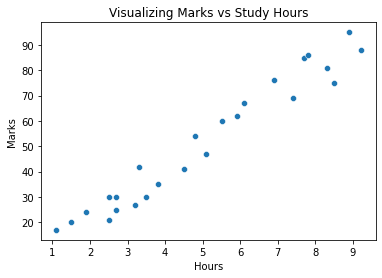

In [7]:
# visualizing the Hours and Scores using scatter plot
sns.scatterplot(data=df,x=df['Hours'],y=df['Scores'])
plt.title('Visualizing Marks vs Study Hours')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()


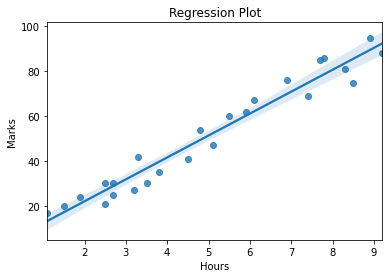

In [8]:
# Plotting the regression line
sns.regplot(x=df['Hours'],y=df['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()

We can see that Marks obtained by students are highly correlated to their study Hours

In [9]:
# importing more libraries for creating model and finding the accuracy of the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Model Building
#### Splitting Data into Training Sets and Test Sets

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

We have defined the X and y

In [11]:
# splitting the data into training and test sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# fitting the data into the model
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

In [13]:
# predicting the marks
y_pred = regression.predict(val_X)

In [14]:
# Actual VS Predicted Marks
df_new= pd.DataFrame({'Actual': val_y, 'Predicted': y_pred})  
df_new

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### What will be predicted score if a student studies for 9.25 hrs/ day? 


In [15]:
hours=[9.25]
score_predicted=regression.predict([hours])
print(score_predicted)

[92.38611528]


As per the model, if student studies for 9.25 Hrs/day, he/she is likely to score 92.39 marks.

In [16]:
# lets calculate the Mean absoulte error
print('Mean Absolute Error for above prediction is:')
print( metrics.mean_absolute_error(val_y, y_pred)) 

Mean Absolute Error for above prediction is:
3.920751190209927


We got the MAE value 3.92, it means that there is less no of chances to get the wrong prediction using above model.